In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
train=pd.read_csv("C://Users//Vishal//Desktop//techgig//2//training.csv")

In [12]:
train=train.reset_index()

train.drop(columns=['index'],axis=1,inplace=True)

In [7]:
train

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
0,2015,Q1,AFGHANISTAN,37194,32721,96.7,676.4
1,2015,Q1,AUSTRALIA,16676,19075,89.7,423.7
2,2015,Q1,AUSTRIA,13318,15529,563.8,707.0
3,2015,Q1,BAHRAIN,114087,133527,585.7,1909.5
4,2015,Q1,BANGLADESH,76357,75673,624.1,1052.9
...,...,...,...,...,...,...,...
427,2016,Q4,UNITED KINGDOM,344803,271671,11162.8,16590.3
428,2016,Q4,UNITED STATES,141495,120505,1444.4,2542.4
429,2016,Q4,UZBEKISTAN,14028,11794,1012.9,1329.8
430,2016,Q4,VIETNAM,0,0,0.0,0.0


In [4]:
train[train['PASSENGERS_TO_INDIA']==0].sort_values(by=['COUNTRY_NAME'])

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
275,2016,Q2,BELGIUM,0,0,0.0,0.0
329,2016,Q3,BELGIUM,0,0,0.0,0.0
383,2016,Q4,BELGIUM,0,0,0.0,0.0
284,2016,Q2,GEORGIA,0,0,0.0,0.0
176,2015,Q4,GEORGIA,0,0,0.0,0.0
122,2015,Q3,GEORGIA,0,0,0.0,0.0
230,2016,Q1,GEORGIA,0,0,0.0,0.0
14,2015,Q1,GEORGIA,0,0,0.0,0.0
68,2015,Q2,GEORGIA,0,0,0.0,0.0
392,2016,Q4,GEORGIA,0,0,0.0,0.0


Here we have missing values. We remove the cities which have no entries in the table. And copy values since the number of passengers going from and coming too  almost have same values.

In [8]:
x=[]
x.append(['SOUTH AFRICA',int(645+11916)/2])
train=train[train['COUNTRY_NAME']!="SOUTH AFRICA"]

In [9]:
x.append(['JORDAN',0])
train=train[train['COUNTRY_NAME']!="JORDAN"]

In [10]:
x.append(['GEORGIA',0])
train=train[train['COUNTRY_NAME']!="GEORGIA"]

In [13]:
train[train['COUNTRY_NAME']=='IRAQ']

,YEAR,QUARTER,COUNTRY_NAME,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA
17,2015,Q1,IRAQ,0,0,0.0,0.0
68,2015,Q2,IRAQ,0,842,0.0,0.0
119,2015,Q3,IRAQ,2586,2226,0.0,0.0
170,2015,Q4,IRAQ,0,377,0.0,1.3
221,2016,Q1,IRAQ,993,986,0.0,0.0
272,2016,Q2,IRAQ,0,218,0.0,0.0
323,2016,Q3,IRAQ,1732,1742,0.0,0.0
374,2016,Q4,IRAQ,1459,1625,0.0,0.0


In [14]:
for i in range(0,len(train["PASSENGERS_TO_INDIA"])):
    if train['PASSENGERS_TO_INDIA'][i]==0:
        train['PASSENGERS_TO_INDIA'][i]=train['PASSENGERS_FROM_INDIA'][i]
               

C:\Users\Vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now we convert it into the form of country_name as columns and passengers as values in the order of quarters and year. Find the weighted mean and predict

In [15]:
train=train.sort_values(by=['COUNTRY_NAME','YEAR'])

C:\Users\Vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vishal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future

[['AFGHANISTAN', 30507],
 ['AUSTRALIA', 16461],
 ['AUSTRIA', 10913],
 ['BAHRAIN', 130731],
 ['BANGLADESH', 79218],
 ['BELGIUM', 21035],
 ['BHUTAN', 10573],
 ['BURMA', 6360],
 ['CANADA', 21743],
 ['CHINA', 69854],
 ['EGYPT', 3473],
 ['ETHIOPIA', 25345],
 ['FINLAND', 10331],
 ['FRANCE', 85596],
 ['GERMANY', 157516],
 ['HONG KONG', 176112],
 ['IRAN', 8439],
 ['IRAQ', 1172],
 ['ISRAEL', 7313],
 ['ITALY', 17500],
 ['JAPAN', 36415],
 ['KAZAKHSTAN', 8074],
 ['KENYA', 20577],
 ['KOREA', 19606],
 ['KUWAIT', 119378],
 ['KYRGYZSTAN', 2109],
 ['MALAYSIA', 262710],
 ['MALDIVES', 28051],
 ['MAURITIUS', 22282],
 ['NEPAL', 100874],
 ['NETHERLANDS', 42744],
 ['OMAN', 327182],
 ['PAKISTAN', 2834],
 ['QATAR', 344632],
 ['REUNION', 641],
 ['RUSSIA', 31535],
 ['SAUDI ARABIA', 391344],
 ['SEYCHELLES', 5341],
 ['SINGAPORE', 422334],
 ['SRI LANKA', 246150],
 ['SWITZERLAND', 33710],
 ['TAIWAN', 3353],
 ['TAJIKISTAN', 1030],
 ['THAILAND', 333565],
 ['TURKEY', 50970],
 ['TURKMENISTAN', 10303],
 ['UNITED KINGDOM'

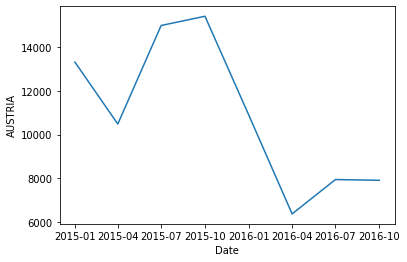

In [16]:
train1=train[['YEAR','QUARTER','COUNTRY_NAME','PASSENGERS_TO_INDIA']]

m={'Q1':1,'Q2':4,'Q3':7,'Q4':10}
train1['month']=train1['QUARTER'].map(m)

train1['Date'] = pd.to_datetime(train1.assign(Day=1).loc[:, ['YEAR', 'month', 'Day']])

train2=train1[['COUNTRY_NAME','PASSENGERS_TO_INDIA','Date']]

train2=train2.pivot(index='Date',columns='COUNTRY_NAME',values='PASSENGERS_TO_INDIA').reset_index()

train2

sns.lineplot(x='Date',y='AUSTRIA',data=train2)

def return_mean(t):
    sum=0
    n=0
    for i in range(0,len(t)):
        if(t[i]==0 and i%4==0):
            sum=sum+1.2*t[i]
            n=n+1.2
        elif(t[i]!=0):
            sum=sum+0.8*t[i]
            n=n+0.8
    if n==0:
        return 0
    else:
        return int(sum/n)



df=[]
for i in train2.columns:
    if i=='Date':
        continue
    else:
        df.append([i,return_mean(train2[i])])

df

Format of the data we processed into

In [18]:
train2

COUNTRY_NAME,Date,AFGHANISTAN,AUSTRALIA,AUSTRIA,BAHRAIN,BANGLADESH,BELGIUM,BHUTAN,BURMA,CANADA,...,TAIWAN,TAJIKISTAN,THAILAND,TURKEY,TURKMENISTAN,UNITED KINGDOM,UNITED STATES,UZBEKISTAN,VIETNAM,YEMEN
0,2015-01-01,37194,16676,13318,114087,76357,21266,6251,9540,13272,...,2595,554,299368,48881,13722,279656,89464,10220,977,6841
1,2015-04-01,26708,13117,10481,131510,66500,18593,12345,3688,9404,...,1288,2600,308994,45687,5572,271143,83597,12503,1196,318
2,2015-07-01,27081,15141,14994,118138,73625,22725,6868,2339,11480,...,1472,541,293122,49767,10178,319070,94023,14620,1828,21
3,2015-10-01,24290,18058,15418,134988,82047,24329,11121,7124,22728,...,4858,558,359590,36867,12147,339201,98269,13289,2267,44
4,2016-01-01,39719,16981,10892,131984,83989,18265,9083,9006,28745,...,4218,848,332072,51627,13210,330255,122017,11584,2245,59
5,2016-04-01,22483,15797,6363,141578,82053,0,15185,3203,21579,...,2057,1149,351894,51091,6474,248339,108922,11547,0,430
6,2016-07-01,28759,16293,7938,138471,83101,0,10566,2372,25816,...,3614,1050,349844,56502,10142,317249,115172,13807,0,582
7,2016-10-01,37827,19627,7903,135094,86076,0,13170,13609,40920,...,6727,944,373640,67343,10985,344803,141495,14028,0,1111


Random Forest Regressor for prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)


In [168]:
preds=[]
for i in train2.columns:
    if i=='Date':
        continue
    else:
        x=train2[i]
        columns = [(x.shift(i)) for (i) in range(1, 1+1)]
        df=pd.DataFrame(x)
        df=pd.concat(columns,axis=1)
        df.fillna(0,inplace=True)
        rf.fit(df[[i]],x)
        pred=rf.predict([[x[7]]])
        preds.append([i,int(pred)])
        

In [169]:
preds

[['AFGHANISTAN', 25863],
 ['AUSTRALIA', 16121],
 ['AUSTRIA', 9328],
 ['BAHRAIN', 136132],
 ['BANGLADESH', 82857],
 ['BELGIUM', 5670],
 ['BHUTAN', 7977],
 ['BURMA', 3591],
 ['CANADA', 25447],
 ['CHINA', 75007],
 ['EGYPT', 3494],
 ['ETHIOPIA', 37136],
 ['FINLAND', 6745],
 ['FRANCE', 83762],
 ['GERMANY', 159369],
 ['HONG KONG', 164720],
 ['IRAN', 8229],
 ['IRAQ', 962],
 ['ISRAEL', 6285],
 ['ITALY', 19852],
 ['JAPAN', 43089],
 ['KAZAKHSTAN', 8654],
 ['KENYA', 23421],
 ['KOREA', 22856],
 ['KUWAIT', 131364],
 ['KYRGYZSTAN', 2792],
 ['MALAYSIA', 295265],
 ['MALDIVES', 28465],
 ['MAURITIUS', 23122],
 ['NEPAL', 97720],
 ['NETHERLANDS', 23310],
 ['OMAN', 358771],
 ['PAKISTAN', 2583],
 ['QATAR', 362769],
 ['REUNION', 460],
 ['RUSSIA', 24307],
 ['SAUDI ARABIA', 412753],
 ['SEYCHELLES', 5788],
 ['SINGAPORE', 397474],
 ['SRI LANKA', 265766],
 ['SWITZERLAND', 34479],
 ['TAIWAN', 3604],
 ['TAJIKISTAN', 1108],
 ['THAILAND', 343337],
 ['TURKEY', 60842],
 ['TURKMENISTAN', 12127],
 ['UNITED KINGDOM', 2989

In [110]:
test=pd.read_csv("C://Users//Vishal//Desktop//techgig//2//testing.csv")

In [173]:
dt=pd.DataFrame(preds)
dt=dt.append(pd.DataFrame(x))

In [174]:
dt=dt.rename(columns={0:"COUNTRY_NAME",1:"PASSENGERS_TO_INDIA"})

In [175]:
dt=dt.reset_index()

In [176]:
dt.drop(columns=['index'],inplace=True)

In [177]:
dt=dt.sort_values(by=['COUNTRY_NAME'])

In [178]:
dt['PASSENGERS_TO_INDIA']=dt['PASSENGERS_TO_INDIA'].apply(lambda x:int(x))

In [179]:
dt

,COUNTRY_NAME,PASSENGERS_TO_INDIA
0,AFGHANISTAN,25863
1,AUSTRALIA,16121
2,AUSTRIA,9328
3,BAHRAIN,136132
4,BANGLADESH,82857
5,BELGIUM,5670
6,BHUTAN,7977
7,BURMA,3591
8,CANADA,25447
9,CHINA,75007


In [180]:
dt.to_csv(r'C:/Users/Vishal/Desktop/dt.csv',index=False)